In [1]:
import pandas as pd
import numpy as np

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
enc = preprocessing.OneHotEncoder()



from keras.layers import Input, Dense
from keras import regularizers

from tensorflow.keras import Model
from tensorflow.keras import Sequential
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError



from keras.models import Model
from keras.layers import Input, Dense
from keras import regularizers
from keras.layers import LSTM


from dask import dataframe as dd 

from xgboost import XGBRegressor

import snowflake.connector

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


from sklearn.preprocessing import MinMaxScaler
from sklearn.inspection import permutation_importance
import seaborn as sns 
from matplotlib import pyplot as plt

import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual



#Classifier imports
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.linear_model import Ridge 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
from ipywidgets import interact, Dropdown
from IPython.html import widgets
from IPython.display import display
import panel as pn
pn.extension()
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))


C:\ProgramData\Anaconda3\lib\site-packages\IPython\html.py:12: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  warn("The `IPython.html` package has been deprecated since IPython 4.0. "


In [80]:
conn = snowflake.connector.connect( user = 'sam winter', password = 'Mas1wint', account = 'oe73222.eu-west-2.aws', database = 'SAELSFORCE', schema = 'TEST' )

cs = cur = conn.cursor()

allrows=cs.execute("SELECT * FROM  DEPLAYPEN.SALESFORCEPOC.PROCESSEDSALESFORCE").fetchall()
                 #  WILMDIVISION,WILMORGNAME, CLIENTORG, OPPORTUNITYNAME, STAGENAME, TYPE, FISCALQUARTER, AMOUNT, REVENUE, UNITPRICE, CREDITNOTETOTAL , CREATEDATE, CLOSEDATE, PIPETIME, PIPETIMED, TIMEVAL, CREDITVAL FROM DEPLAYPEN.SALESFORCEPOC.SALESFORCESCALED  ").fetchall()

bas = pd.DataFrame(allrows)

#bas = bas.drop_duplicates()



In [81]:

bas.columns = ['WILMDIVISION','WILMORGNAME','WILMORGNAMECODE','CLIENTORG','OPPORTUNITYNAME','STAGENAME','PRODUCTNAME','FISCALQUARTER','TYPE','CREATEDDATE','CLOSEDATE','AMOUNT','CREDITNOTETOTAL','REVENUE','COST','UNITPRICE','CLOSEDT','PIPETIME','PIPETIMED','TIMEVAL','CREDITVAL','WILMORGNAMECODELE','CLIENTORGLE','OPPORTUNITYNAMELE','PRODUCTNAMELE','STAGENAMELE','FISCALQUARTERLE','TYPELE','CREATEDDATELE','CLOSEDTLE','PIPETIMELE','WILMDIVISIONLE','WILMORGNAMELE','AMOUNTSCALED','CREDITNOTETOTALSCALED','REVENUESCALED','COSTSCALED','UNITPRICESCALED','PIPETIMEDSCALED','TIMEVALSCALED','CREDITVALSCALED','CNLABEL','CLUSTER','CLUSTERCAT']


In [5]:
bas 

,WILMDIVISION,WILMORGNAME,WILMORGNAMECODE,CLIENTORG,OPPORTUNITYNAME,STAGENAME,PRODUCTNAME,FISCALQUARTER,TYPE,CREATEDDATE,...,CREDITNOTETOTALSCALED,REVENUESCALED,COSTSCALED,UNITPRICESCALED,PIPETIMEDSCALED,TIMEVALSCALED,CREDITVALSCALED,CNLABEL,CLUSTER,CLUSTERCAT
0,Risk & Compliance,ICA Commercial Services Ltd,ICT,GP Strategies Egypt LLC,20180927 IH-HSBC Certificate in FCR - Egypt,Closed Won,ICA Certificate in Financial Crime Risk - HSBC...,2019 1,New Business,2016-04-21 10:27:11,...,0.248990,0.470211,0.0,0.068288,0.516640,0.650453,0.381281,155.0,7,H
1,Risk & Compliance,ICA Commercial Services Ltd,ICT,GP Strategies Egypt LLC,20180927 IH-HSBC Certificate in FCR - Egypt,Closed Won,ICA Certificate in Financial Crime Risk - HSBC...,2019 1,New Business,2016-04-21 10:27:11,...,0.248990,0.470211,0.0,0.066516,0.516640,0.650453,0.381281,155.0,7,H
2,Risk & Compliance,International Compliance Association (ICA),ICA,Tony Ford,Tony Ford - ICA - 23/3/2019,Closed Won,ICA Associate Membership,2019 3,Auto-Renewal,2017-03-23 16:46:51,...,0.229141,0.470293,0.0,0.067046,0.471210,0.650292,0.381281,8.0,5,F
3,Risk & Compliance,International Compliance Association (ICA),ICA,Tony Ford,Tony Ford - ICA - 23/3/2019,Closed Won,ICA Associate Membership,2019 3,Auto-Renewal,2017-03-23 16:46:51,...,0.228567,0.470293,0.0,0.067046,0.471210,0.650292,0.380681,1.0,5,F
4,Risk & Compliance,International Compliance Association (ICA),ICA,Ann-Marie Patton,Ann-Marie Patton - ICA - 23/3/2019,Closed Won,ICA (MICA) Membership (12 months),2019 3,Auto-Renewal,2018-03-23 11:54:54,...,0.229266,0.470328,0.0,0.067277,0.382198,0.650297,0.381281,45.0,2,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47603,Risk & Compliance,International Compliance Association (ICA),ICA,Liesl Clothier,Liesl Clothier - Affiliate - 27/10/2018,Closed Won,ICA Affiliate Membership (12 months),2019 2,Auto-Renewal,2016-10-03 12:51:45,...,0.229104,0.470280,0.0,0.066978,0.484945,0.650291,0.381281,7.0,4,E
47604,Risk & Compliance,International Compliance Association (ICA),ICA,John Oridupa,John Oridupa - Affiliate - 27/10/2018,Closed Won,ICA Affiliate Membership (12 months),2019 2,Auto-Renewal,2016-10-27 09:34:20,...,0.229104,0.470280,0.0,0.066978,0.478605,0.650291,0.381281,7.0,4,E
47605,Risk & Compliance,International Compliance Association (ICA),ICA,Marina Shestakova,Marina Shestakova - Affiliate - 3/11/2018,Closed Won,ICA Affiliate Membership (12 months),2019 2,Auto-Renewal,2017-12-01 00:04:45,...,0.229104,0.470280,0.0,0.066978,0.375066,0.650294,0.381281,7.0,9,K
47606,Risk & Compliance,International Compliance Association (ICA),ICA,Pedro Pinheiro,Associate Pedro Pinheiro - 28/9/2018,Closed Won,ICA Associate Membership,2019 1,Auto-Renewal,2016-09-28 10:34:16,...,0.229141,0.470293,0.0,0.067046,0.478870,0.650292,0.381281,31.0,3,D


In [6]:
ing = bas.select_dtypes('int')
fl = bas.select_dtypes('float')
ob = bas.select_dtypes('object')

In [7]:
print('Memory usage before data types are changed:')
bas.info(memory_usage = 'deep') 


            

for i in ing.columns:
        if bas[i].astype('int64').any() > 32767:
            bas[i] =  bas[i].astype('int64', errors='raise')
        elif bas[i].astype('int32').between(127, 32767).any():
            bas[i] =  bas[i].astype('int32', errors='raise')
        else:
            bas[i] =  bas[i].astype('int16', errors='raise')

for i in fl.columns:
        if bas[i].astype('float64').max() > 32767:
            bas[i] =  bas[i].astype('float64', errors='raise')
        elif bas[i].astype('float32').between(127, 32767).any():
            bas[i] =  bas[i].astype('float32', errors='raise')
        else:
            bas[i] =  bas[i].astype('float16', errors='raise')    

for i in ob.columns:
        bas[i] = bas[i].astype('category') 

bnn = bas[bas.CNLABEL.notna()].round(0).astype('int64', errors='ignore')
ban = bas[bas.CNLABEL.isna()]
bas = pd.concat([bnn, ban]) 

print('------------------------------------------------------------------------------------------------------------------------------------')
print('Memory usage after data types are changed:')
bas.info(memory_usage='deep')         


Memory usage before data types are changed:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47608 entries, 0 to 47607
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   WILMDIVISION           47608 non-null  object 
 1   WILMORGNAME            47608 non-null  object 
 2   WILMORGNAMECODE        47608 non-null  object 
 3   CLIENTORG              47608 non-null  object 
 4   OPPORTUNITYNAME        47608 non-null  object 
 5   STAGENAME              47608 non-null  object 
 6   PRODUCTNAME            47608 non-null  object 
 7   FISCALQUARTER          47608 non-null  object 
 8   TYPE                   47608 non-null  object 
 9   CREATEDDATE            47608 non-null  object 
 10  CLOSEDATE              47608 non-null  object 
 11  AMOUNT                 47608 non-null  float64
 12  CREDITNOTETOTAL        47608 non-null  float64
 13  REVENUE                47608 non-null  float64
 14  COST      

In [8]:
allClients = (bas.CLIENTORG.unique()) 

allWilm = (bas.WILMORGNAME.unique()) 


allType = (bas.TYPE.unique()) 

allWEEKs = 0

defaultTargetProf =  1265.88

defaultTargetPecent=  120

allOpps = bas.OPPORTUNITYNAME.unique()

In [98]:
bas['WEEK'] = bas.PIPETIMED/7

<AxesSubplot:>

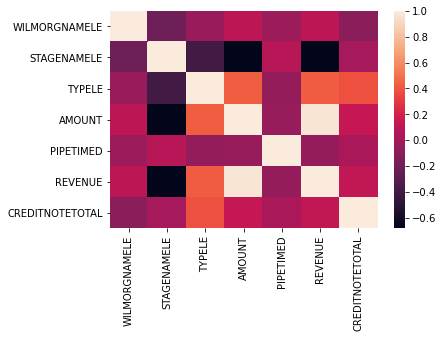

In [10]:
bt = bas[['WILMORGNAMELE', 'STAGENAMELE',
       'TYPELE', 'AMOUNT', 'PIPETIMED', 'REVENUE', 'CREDITNOTETOTAL']]

corr = bt.corr(method ='kendall')

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)     

In [11]:
cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

toCorr = bas[['WILMORGNAMELE', 'STAGENAMELE','TYPELE', 'AMOUNT', 'PIPETIMED', 'REVENUE', 'CREDITNOTETOTAL']]
corr = toCorr.corr(method ='kendall')

corr.style.background_gradient(cmap, axis=1)\
.set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
.set_caption("Hover to magify")\
.set_precision(2)\
.set_table_styles(magnify())

    



,WILMORGNAMELE,STAGENAMELE,TYPELE,AMOUNT,PIPETIMED,REVENUE,CREDITNOTETOTAL
WILMORGNAMELE,1.00,-0.21,-0.03,0.11,-0.03,0.10,-0.10
STAGENAMELE,-0.21,1.00,-0.39,-0.68,0.08,-0.68,0.01
TYPELE,-0.03,-0.39,1.00,0.43,-0.05,0.43,0.38
AMOUNT,0.11,-0.68,0.43,1.00,-0.05,0.97,0.13
PIPETIMED,-0.03,0.08,-0.05,-0.05,1.00,-0.06,0.03
REVENUE,0.10,-0.68,0.43,0.97,-0.06,1.00,0.12
CREDITNOTETOTAL,-0.10,0.01,0.38,0.13,0.03,0.12,1.00


In [51]:
bas.select_dtypes(np.number).columns   
basNum = ['AMOUNT', 'CREDITNOTETOTAL', 'REVENUE', 'COST', 'UNITPRICE',
       'PIPETIMED', 'TIMEVAL', 'CREDITVAL', 'WILMORGNAMECODELE', 'CLIENTORGLE',
       'OPPORTUNITYNAMELE', 'PRODUCTNAMELE', 'STAGENAMELE', 'FISCALQUARTERLE',
       'TYPELE', 'CREATEDDATELE', 'CLOSEDTLE', 'PIPETIMELE', 'WILMDIVISIONLE',
       'WILMORGNAMELE']

In [12]:
bas = bas.sample(frac = 0.05)

In [108]:
def CorMap(FeaturesToCorrelate = bas.select_dtypes(np.number).columns):

    cmap=sns.diverging_palette(5, 250, as_cmap=True)

    toCorr = bas[FeaturesToCorrelate]
    corr = toCorr.corr(method ='kendall')

    TableStyles = [dict(selector="th",
                     props=[("font-size", "7pt")]),
                dict(selector="td",
                     props=[('padding', "0em 0em")]),
                dict(selector="th:hover",
                     props=[("font-size", "12pt")]),
                dict(selector="tr:hover td:hover",
                     props=[('max-width', '200px'),
                            ('font-size', '12pt')])
    ]

   
    return corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(TableStyles)
    
CorMap(['AMOUNT', 'CREDITNOTETOTAL', 'REVENUE', 'COST', 'UNITPRICE',
       'PIPETIMED', 'TIMEVAL', 'CREDITVAL', 'WILMORGNAMECODELE', 'CLIENTORGLE',
       'OPPORTUNITYNAMELE', 'PRODUCTNAMELE', 'STAGENAMELE', 'FISCALQUARTERLE',
       'TYPELE', 'CREATEDDATELE', 'CLOSEDTLE', 'PIPETIMELE', 'WILMDIVISIONLE',
       'WILMORGNAMELE', 'AMOUNTSCALED'])    
    
 
# CorMap(['WILMDIVISIONLE', 'WILMORGNAMELE', 'CLIENTORGLE',
#        'OPPORTUNITYNAMELE', 'STAGENAMELE', 'TYPELE', 'AMOUNT', 'REVENUE',
#        'UNITPRICE', 'CREDITNOTETOTAL', 'FISCALQUARTER', 'CREATEDATE',
#        'CLOSEDATE', 'PIPETIME', 'PIPETIMED', 'TIMEVAL', 'CREDITVAL',
#        'TIMEVALSCALED', 'PIPETIMEDSCALED', 'CREDITNOTESCALED', 'AMOUNTSCALED',
#        'CREDITVALSCALED', 'CNLABEL', 'CLUSTER', 'CLUSTERCAT', 'WEEK'])

CorMap(['AMOUNT', 'CREDITNOTETOTAL', 'REVENUE', 'COST', 'UNITPRICE',
       'PIPETIMED', 'TIMEVAL', 'CREDITVAL', 'WILMORGNAMECODELE', 'CLIENTORGLE',
       'OPPORTUNITYNAMELE', 'PRODUCTNAMELE', 'STAGENAMELE', 'FISCALQUARTERLE',
       'TYPELE', 'CREATEDDATELE', 'CLOSEDTLE', 'PIPETIMELE', 'WILMDIVISIONLE',
       'WILMORGNAMELE', 'AMOUNTSCALED']) 

,AMOUNT,CREDITNOTETOTAL,REVENUE,COST,UNITPRICE,PIPETIMED,TIMEVAL,CREDITVAL,WILMORGNAMECODELE,CLIENTORGLE,OPPORTUNITYNAMELE,PRODUCTNAMELE,STAGENAMELE,FISCALQUARTERLE,TYPELE,CREATEDDATELE,CLOSEDTLE,PIPETIMELE,WILMDIVISIONLE,WILMORGNAMELE,AMOUNTSCALED
AMOUNT,1.00,0.13,0.97,nan,-0.28,-0.05,0.54,0.51,0.25,-0.01,0.25,0.11,-0.68,-0.06,0.43,0.00,-0.06,-0.11,0.43,0.11,1.00
CREDITNOTETOTAL,0.13,1.00,0.12,nan,0.03,0.03,-0.03,-0.09,0.08,-0.01,-0.00,0.15,0.01,0.11,0.38,-0.01,0.10,-0.09,0.03,-0.10,0.13
REVENUE,0.97,0.12,1.00,nan,-0.29,-0.06,0.53,0.51,0.25,-0.01,0.25,0.11,-0.68,-0.06,0.43,0.01,-0.06,-0.12,0.43,0.10,0.97
COST,nan,nan,nan,1.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
UNITPRICE,-0.28,0.03,-0.29,nan,1.00,0.07,-0.17,-0.17,-0.11,-0.01,-0.11,-0.08,0.25,-0.01,-0.20,-0.05,-0.01,0.06,-0.33,0.02,-0.28
PIPETIMED,-0.05,0.03,-0.06,nan,0.07,1.00,0.14,-0.06,0.02,-0.04,-0.07,-0.00,0.08,0.10,-0.05,-0.70,0.09,0.20,-0.08,-0.03,-0.05
TIMEVAL,0.54,-0.03,0.53,nan,-0.17,0.14,1.00,0.36,0.21,-0.02,0.17,0.08,-0.45,-0.09,0.17,-0.13,-0.08,0.12,0.29,0.09,0.54
CREDITVAL,0.51,-0.09,0.51,nan,-0.17,-0.06,0.36,1.00,0.09,-0.00,0.27,0.01,-0.71,-0.15,0.23,-0.01,-0.15,-0.07,0.41,0.19,0.51
WILMORGNAMECODELE,0.25,0.08,0.25,nan,-0.11,0.02,0.21,0.09,1.00,-0.01,0.12,0.10,-0.16,0.10,0.17,-0.00,0.10,-0.05,-0.06,0.64,0.25
CLIENTORGLE,-0.01,-0.01,-0.01,nan,-0.01,-0.04,-0.02,-0.00,-0.01,1.00,0.26,-0.00,-0.00,0.00,-0.02,0.05,0.00,0.01,0.01,0.00,-0.01


In [112]:
pd.set_option('display.max_rows',100)
#Cell > All Outputs > Toggle Scrolling (On the Menu Bar) to show entire output of function

def Above20orXIncrease(ClientOrg = allClients, Type = allType, MinWeeksToComplete = 0,  WILMORGNAME = allWilm, Opportunities = allOpps, TargetMinRevenue = -99999999, TargetMinPercentRevenue = -9999999, forCorr = basNum):
    
    OrgMask = bas.CLIENTORG.isin(ClientOrg)
    TypeMask = bas.TYPE.isin(Type)
    PipeMask = bas.WEEK > MinWeeksToComplete
    WILMORGNAMEMask = bas.WILMORGNAME.isin(WILMORGNAME)
    RevenueMask =  bas.REVENUE > TargetMinRevenue 
    PercentMask =  bas.REVENUE > (1054.9 * (TargetMinPercentRevenue/100)) 
    OppMask =  bas.OPPORTUNITYNAME.isin(Opportunities)

    
    bashighProf = bas[(OrgMask) & (TypeMask) & (PipeMask)  & (WILMORGNAMEMask) & (RevenueMask) & (PercentMask) & (OppMask)] 

    y = bas[(OrgMask) & (TypeMask) & (PipeMask)  & (WILMORGNAMEMask)].REVENUE.mean()
    yi = bas.REVENUE.mean() 
    
    Percentagediff = ((y-yi) / yi * 100) 
    print('Likely Revenue Given Input:', round(y,2), '    Average Opportunity Revenue:', round(yi,2), 
          '    Average vs Likely (% Difference):', round(Percentagediff, 2), )
    
  
    PossibleWILMORGNAMEs = bashighProf.groupby(['WILMORGNAME']).agg({'REVENUE': ['mean']}).reset_index()
    PossibleWILMORGNAMEs = pd.DataFrame(PossibleWILMORGNAMEs)
    PossibleWILMORGNAMEs.columns = ['Wilm Orgs Meeting Targets, ranked by revenue', 'Average Revenue']
    PossibleWILMORGNAMEs =  PossibleWILMORGNAMEs.sort_values(by = 'Average Revenue',ascending=False).dropna(axis=0, how='any')
    
    PossibleClientOrgs = bashighProf.groupby(['CLIENTORG']).agg({'REVENUE': ['mean']}).reset_index()
    PossibleClientOrgs = pd.DataFrame(PossibleClientOrgs)
    PossibleClientOrgs.columns = ['Clients Meeting Targets, ranked', 'Average Revenue']
    PossibleClientOrgs =  PossibleClientOrgs.sort_values(by = 'Average Revenue',ascending=False).dropna(axis=0, how='any')
    
    PossibleTypes = bashighProf.groupby(['TYPE']).agg({'REVENUE': ['mean']}).reset_index()
    PossibleTypes = pd.DataFrame(PossibleTypes)
    PossibleTypes.columns = ['Opportunity types meeting Targets, ranked', 'Average Revenue']
    PossibleTypes =  PossibleTypes.sort_values(by = 'Average Revenue',ascending=False).dropna(axis=0, how='any')
    
    PossibleDivisions = bashighProf.groupby(['WILMDIVISION']).agg({'REVENUE': ['mean']}).reset_index()
    PossibleDivisions = pd.DataFrame(PossibleDivisions)
    PossibleDivisions.columns = ['Divisions Meeting Targets, ranked', 'Average Revenue']
    PossibleDivisions =  PossibleDivisions.sort_values(by = 'Average Revenue',ascending=False).dropna(axis=0, how='any')
    
    

    
      
    print("--------------------------------------------------------------------------------------------------------- ")
    print('Features that have given a Revenue above target absolute and percentage revenue with selected dimensions:'),
    display(PossibleWILMORGNAMEs), display(PossibleTypes), display(PossibleDivisions), display(PossibleClientOrgs)

    print("--------------------------------------------------------------------------------------------------------- ")
    print('Unique combinations of features with a Revenue above set revenue targets and within combinations:'),
       
    
  #  AllCombinations = bas.sample(frac=.3).groupby(['WILMDIVISION','WILMORGNAME', 'CLIENTORG', 'TYPE']).agg({'REVENUE': ['mean', 'std'], 'PIPETIMED': 'mean'}).reset_index()#, 'PIPETIMED': ['mean']})
  #  AllCombinations = pd.DataFrame(AllCombinations)

   # AllCombinations.columns = ['WILMDIVISION','WILMORGNAME', 'CLIENTORG', 'TYPE', 'Average Revenue', 'Avg Revenue Standard Deviation', 'Average Open To Close Days']#, 'Avg Revenue Max']
   # display(AllCombinations.sort_values(by = 'Average Revenue',ascending=False))
    
    print("--------------------------------------------------------------------------------------------------------- ")
    print('Correlaton between selected dimensions converted to numeric format, and measures, with selected dimensions:'),
    
#     toCorr = bashighProf[forCorr]
#     corr = toCorr.corr(method ='kendall')
#     display(corr)
    
    display(CorMap(FeaturesToCorrelate = forCorr))


    
#     cmap=sns.diverging_palette(5, 250, as_cmap=True)


#     TableStyles = [dict(selector="th",
#                      props=[("font-size", "7pt")]),
#                 dict(selector="td",
#                      props=[('padding', "0em 0em")]),
#                 dict(selector="th:hover",
#                      props=[("font-size", "12pt")]),
#                 dict(selector="tr:hover td:hover",
#                      props=[('max-width', '200px'),
#                             ('font-size', '12pt')])
#     ]

   
#     display (corr.style.background_gradient(cmap, axis=1)\
#     .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
#     .set_caption("Hover to magify")\
#     .set_precision(2)\
#     .set_table_styles(TableStyles)) 
     


    
    
    
Above20orXIncrease(TargetMinPercentRevenue = 130, MinWeeksToComplete = 40)#, WILMORGNAME = ['ICA']) #Opportunities=['Credit Of W-1113094 Various HMRC remaining licenses'], , TargetMinRevenue = 1265.88,  TargetMinPercentRevenue = 120) 

Likely Revenue Given Input: 4681.51     Average Opportunity Revenue: 3845.99     Average vs Likely (% Difference): 21.72
--------------------------------------------------------------------------------------------------------- 
Features that have given a Revenue above target absolute and percentage revenue with selected dimensions:


,"Wilm Orgs Meeting Targets, ranked by revenue",Average Revenue
17,Wilmington Healthcare Ltd,157749.011605
8,ICTA Malaysia,134163.381295
15,Smee and Ford,71212.692308
6,ICA Audit Limited,67973.733333
1,Adkins Matchett & Toy (Hong Kong) Limited,25079.673077
12,International Compliance Training Academy Pte Ltd,21288.601566
11,International Compliance Training (ME) Ltd,19193.016796
7,ICA Commercial Services Ltd,19003.656845
10,International Compliance Association (ICA),12278.431515
14,Mercia Group Ltd,9191.818182


,"Opportunity types meeting Targets, ranked",Average Revenue
3,New Business - Existing Customer,31197.550000
4,Renewal,28408.934775
2,New Business,21171.387172
5,Repeat Business,20830.856471
6,Transfer/Reissue,11609.680556
0,Auto-Renewal,8760.930000
1,Credit,8372.222222


,"Divisions Meeting Targets, ranked",Average Revenue
0,Healthcare,75910.187196
2,Risk & Compliance,20555.158730
1,Professional,2915.261329


,"Clients Meeting Targets, ranked",Average Revenue
458,Prudential Distribution Limited,750000.000000
401,Napp Pharmaceuticals Limited,416172.820000
41,Asian Institute of Chartered Bankers,147487.554404
611,United Overseas Bank Ltd,146363.684211
49,B Braun Medical Limited,96446.140000
...,...,...
318,Kingstons Will & Trust Planning Ltd,1395.000000
632,Willoughby Corporate Services Ltd,1395.000000
14,Accuity,1390.000000
503,Samantha Worrell,1390.000000


--------------------------------------------------------------------------------------------------------- 
Unique combinations of features with a Revenue above set revenue targets and within combinations:
--------------------------------------------------------------------------------------------------------- 
Correlaton between selected dimensions converted to numeric format, and measures, with selected dimensions:


,AMOUNT,CREDITNOTETOTAL,REVENUE,COST,UNITPRICE,PIPETIMED,TIMEVAL,CREDITVAL,WILMORGNAMECODELE,CLIENTORGLE,OPPORTUNITYNAMELE,PRODUCTNAMELE,STAGENAMELE,FISCALQUARTERLE,TYPELE,CREATEDDATELE,CLOSEDTLE,PIPETIMELE,WILMDIVISIONLE,WILMORGNAMELE
AMOUNT,1.000000,0.339547,0.934799,NaN,0.010347,0.127726,0.731258,0.301962,0.111960,-0.148313,0.008967,0.005342,-0.107227,0.156593,0.066607,-0.058398,0.149397,0.012549,0.076369,0.069711
CREDITNOTETOTAL,0.339547,1.000000,0.335466,NaN,0.027300,0.077700,0.206157,-0.201835,0.026977,-0.055465,0.051174,0.066410,-0.007316,0.072173,-0.030042,-0.032973,0.071989,-0.069395,0.065739,0.043565
REVENUE,0.934799,0.335466,1.000000,NaN,-0.001728,0.134806,0.701168,0.290194,0.108256,-0.151328,0.010432,0.001104,-0.119417,0.159315,0.036622,-0.064597,0.152237,0.009645,0.100484,0.059573
COST,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UNITPRICE,0.010347,0.027300,-0.001728,NaN,1.000000,0.010867,0.006641,0.009474,-0.051319,-0.007663,-0.022135,0.037757,-0.022448,-0.062398,0.068027,-0.047068,-0.056955,-0.022765,-0.151912,0.069977
PIPETIMED,0.127726,0.077700,0.134806,NaN,0.010867,1.000000,-0.145431,0.010710,0.132360,-0.143787,-0.118773,-0.017389,-0.172436,0.234180,0.002780,-0.619796,0.232061,0.064028,-0.014854,-0.066470
TIMEVAL,0.731258,0.206157,0.701168,NaN,0.006641,-0.145431,1.000000,0.320245,0.031885,-0.108079,0.025135,-0.027941,-0.081063,0.083333,0.067373,0.158032,0.078681,0.125798,0.074797,0.100250
CREDITVAL,0.301962,-0.201835,0.290194,NaN,0.009474,0.010710,0.320245,1.000000,-0.039363,-0.060109,-0.025638,-0.059118,0.010555,0.086541,0.055801,0.031372,0.078547,0.003403,0.012000,0.036112
WILMORGNAMECODELE,0.111960,0.026977,0.108256,NaN,-0.051319,0.132360,0.031885,-0.039363,1.000000,0.024561,0.021966,0.068818,-0.115086,0.084066,-0.089557,-0.131037,0.079344,-0.001713,-0.177565,-0.106308
CLIENTORGLE,-0.148313,-0.055465,-0.151328,NaN,-0.007663,-0.143787,-0.108079,-0.060109,0.024561,1.000000,0.270555,0.073015,0.142027,0.007226,0.014050,0.157803,0.006732,0.039708,-0.040086,-0.022914


,AMOUNT,CREDITNOTETOTAL,REVENUE,COST,UNITPRICE,PIPETIMED,TIMEVAL,CREDITVAL,WILMORGNAMECODELE,CLIENTORGLE,OPPORTUNITYNAMELE,PRODUCTNAMELE,STAGENAMELE,FISCALQUARTERLE,TYPELE,CREATEDDATELE,CLOSEDTLE,PIPETIMELE,WILMDIVISIONLE,WILMORGNAMELE
AMOUNT,1.00,0.13,0.97,nan,-0.28,-0.05,0.54,0.51,0.25,-0.01,0.25,0.11,-0.68,-0.06,0.43,0.00,-0.06,-0.11,0.43,0.11
CREDITNOTETOTAL,0.13,1.00,0.12,nan,0.03,0.03,-0.03,-0.09,0.08,-0.01,-0.00,0.15,0.01,0.11,0.38,-0.01,0.10,-0.09,0.03,-0.10
REVENUE,0.97,0.12,1.00,nan,-0.29,-0.06,0.53,0.51,0.25,-0.01,0.25,0.11,-0.68,-0.06,0.43,0.01,-0.06,-0.12,0.43,0.10
COST,nan,nan,nan,1.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
UNITPRICE,-0.28,0.03,-0.29,nan,1.00,0.07,-0.17,-0.17,-0.11,-0.01,-0.11,-0.08,0.25,-0.01,-0.20,-0.05,-0.01,0.06,-0.33,0.02
PIPETIMED,-0.05,0.03,-0.06,nan,0.07,1.00,0.14,-0.06,0.02,-0.04,-0.07,-0.00,0.08,0.10,-0.05,-0.70,0.09,0.20,-0.08,-0.03
TIMEVAL,0.54,-0.03,0.53,nan,-0.17,0.14,1.00,0.36,0.21,-0.02,0.17,0.08,-0.45,-0.09,0.17,-0.13,-0.08,0.12,0.29,0.09
CREDITVAL,0.51,-0.09,0.51,nan,-0.17,-0.06,0.36,1.00,0.09,-0.00,0.27,0.01,-0.71,-0.15,0.23,-0.01,-0.15,-0.07,0.41,0.19
WILMORGNAMECODELE,0.25,0.08,0.25,nan,-0.11,0.02,0.21,0.09,1.00,-0.01,0.12,0.10,-0.16,0.10,0.17,-0.00,0.10,-0.05,-0.06,0.64
CLIENTORGLE,-0.01,-0.01,-0.01,nan,-0.01,-0.04,-0.02,-0.00,-0.01,1.00,0.26,-0.00,-0.00,0.00,-0.02,0.05,0.00,0.01,0.01,0.00


In [90]:
class colour:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

print(colour.BOLD + 'Hello World !' + colour.END)

Hello World !


In [35]:
topclients=['KnowledgePool Group Ltd','BPP Professional Education Ltd','Barclays Bank PLC','Institute of Financial Services (IFS)','HSBC Bank Plc','Kaplan','Danske Bank','European Bank for Reconstruction and Development','Nordea Bank Abp, filial i Sverige','Capita Business Services Ltd','Nordea Danmark, filial af Nordea Bank Abp Finland','United Overseas Bank Ltd','Asian Institute of Chartered Bankers','Kuwait Chamber of Commerce & Industry','HSBC Bank PLC','Danq (Shanghai) Enterprise Development Ltd','KPMG LLP','Yorkshire Building Society','Public Bank Berhad','QA Limited','Orion Corporation','CSA (Services) Ltd','International Compliance Services LLC','Silicon Valley Bank','Galderma (UK) Ltd','The Malaysian Insurance Institute','KPMG Assurance Service Ltda','CIMB Investment Bank Berhad (Learning & Development)','DBS Bank Ltd','CLT International','PwC (Belfast Laganbank)','Harrods Limited','Dubai Financial Services Authority','Courses & Seminars Limited','NatWest PLC','Sean Tynan','Eversheds Sutherland LLP','Bank Simpanan Nasional','FSCom Limited','Stefan Rossi','IBF (Cambodia) Co., Ltd','European Investment Bank','Sovereign Trust (Isle of Man) Limited','Goh Yeow Hua','London Fire Brigade','Stephen Davies','Hill Dickinson LLP','Sim Yuan Xing','Nordea Bank Abp','Les Croupiers Casino','Lloyds Banking Group','Prashant Ganesanathan','GP Strategies Middle East Training LLC','Abacus Trust Company Ltd','Young & Partners Business Lawyers Ltd','Leong Hon Mun','Taylor Wessing LLP','Barclays Bank','TMF Group Fund Services (Jersey) Limited','Capita Plc','Synoption Pte Ltd','Basel Institute on Governance','Georgesons','RBS Services India Private Limited','Jitendra Maheshwari','Bayer PLC','PrimeQuotes LTD','Gibson & Associates Solicitors','Standard Chartered Bank Singapore','Morgan, Lewis & Bockius UK LLP','Financial Ombudsman Service','Mastercard Prepaid Management Services','Teva UK Limited','United Overseas Bank (Malaysia) Berhad','Boodle Hatfield LLP','Tokio Marine Kiln Singapore Pte Ltd','BIBF','Foo Shu Xuan Eileen','LOM FINANCIAL (BAHAMAS)LIMITED','NIIT Limited','Driver and Vehicle Standards Agency','Linklaters LLP','Merkur Zavarovalnica D. D.','Murray Waldren Consulting Pty Ltd','Nationwide Building Society','Special EU Programmes Body','Keith Bell','Ards and North Down Borough Council Accounts','Royal College of Physicians','Erynne Lim','Gohel Kaushalkumar Nirmalsinh','BNP Paribas Securities Services','Kingstons Will & Trust Planning Ltd','Thomson Snell & Passmore LLP','Cambia Health Solutions','White & Case LLP','Frontera Capital Group Limited','Arjay S/O Krishnan','Thomson Reuters Poland Sp. z o.o.','Marvin Hurlston','Nordea Bank Abp Poland Branch','Azets','Benjamin Foo Meng Chen','Parfrey Murphy & Co (Co. Cork)','Win Technologies','Sobia Khan','Franklins Solicitors LLP','Societe Generale','Mid Ulster District Council','Oversea-Chinese Banking Corporation Ltd','Smith Cooper IFS','Sampath Bank Plc','Azets Godalming','BMT Netherlands BV','SumUp Payments Limited, UK','Mishcon De Reya LLP','Ridouts Professional Services plc','Bibi Ahsha Choonarah','UHY Hacker Young','Apixio','Vodacom Lesotho','Healthspan Limited','Rabobank London','BANKA OTP ALBANIA SH.A','Ijapari Onolaja','UBS AG','Ministry of Justice','GP Strategies Poland sp.z.o.o','Elizabeth McGowan','BGL Group Limited','GP Strategies Limited','HFW','GP Strategies Hong Kong Limited','Willoughby Corporate Services Ltd','Refinitiv','Cohen Arnold','S Stromp','Sparkling Consultancy PTE Ltd','Speirs & Jeffrey Ltd','Standard Chartered Bank (Singapore) Limited','C Campbell','Mason Hayes & Curran','Freemarket Fx','MRO Accounts Limited','Wong Mei Teng','Koh Kai Keong, Edwin','Hart Shaw LLP','Luminor Bank AS','Jones Whyte LLP','ASN Partnership Ltd','TransferWise Ltd','Warners Solicitors LLP','Wong Wai Shan Anita','Law Trust Switzerland AG','Neath Port Talbot County Borough Council','Tong Qiao E','Chapman Freeborn International','KPMG AG','Sibonile Mhlope','Barclays Bank Plc','Sri Nur Dalilah Binte Ahmad','Hewitsons LLP','David Andrew Jones','Channel Islands Financial Ombudsman (CIFO)','Jacqueline Besem Iyok Egbe','Nicky Wee Wei Ming','Russell & Co','Peyton Tyler Mears','Chew Yihao','Trowers & Hamlins (Services)','Praxis Trust Ltd','Lam King Hei','Athona Limited','BT','JDB Chartered Certified Accountants','Guernsey Financial Services Commission','South Eastern Trust','Danone Holdings (UK)','Reliance Solicitors','Thomas Mifsud-Tommasi','Jupiter Travels & Tours Pte Ltd','First Abu Dhabi Bank','North Hertfordshire District Council','Sohail  Akbar','National Westminister Bank Plc (PL)','Matt Caro','Shepherd & Wedderburn LLP','Richard Dunlop','Suntera (IOM) Limited','C Lambert','Wendy Tan Sok Yi','Environment Agency','First Heartland Capital JSC','CJC Advisors SA','Ahad Parekh','PraxisIFM Trust Limited','ASOCIACIÄ‚Â“N EUROPEA DE ABOGADOS Y ECONOMISTAS EN COMPLIANCE(AEAEC)','Thompson Mitchell Solicitors','Alcina Tan Si Ning','HSBC Bank plc, Jersey Branch','Zafar Anjum','Newport City Council','Farooq Law Solicitors','Victim Focus','Handelsbanken Plc','Blackadders LLP','Caroline Bugendage Ogwang','Kent Surrey and Sussex Community Rehabilitation Company','Leticia Osei','Generali Å»ycie Towarzystwo UbezpieczeÅ„ S.A','Isma Ali','International In-House Counsel Journal Limited','E&K Solicitors']
TopOp = ["Barclays- Mixed Qualifications","SVB Various Qualifications","IMB BPP/RBS Online Diplomas - Level 6","PGO GRC Jacqueline Besem Iyok Egbe","IMB/IHC/IHA Danske Autumn intake - Marija - Compliance Team","SG Inhouse (UOB) - ICA Advanced Certificate in RC - June 2020","LEU YI LING EILEEN - Adv Cert GRC","FOO SHU XUAN EILEEN (HU SHUXUAN) - Adv Cert GRC","ZZZ - Nordea Sweden - online/in-house","IAH - HSBC - Various Qualifications (Caroline Edwards) 3/4","IME Joanna Simon","PGO GRC zoe allen-robinson","Credit Of W-1108157 IHC-PWC-Online","Credit Of W-928273 INH - RBSI - Adv AML - Jonathan Kennaugh's Booking","ICE Chris Metters","PGO FCC Bernardette Hoffman","ICE Amelia Frost","IMB BPP/RBS Apprentices TBC","Credit Of W-768307 Ritsons - PT Annual DD - Oct 19","Jacqueline Sherlock - SEE - Res Con","KWOK MEI HENG - Dip AML/CFT M4","EDRIC WONG TSEH FOON (EDRIC HUANG ZEFENG) - Adv Cert RC (FC)","TANG YEW LEONG - Adv Cert GRC","IMB-QA/Santander-UK","DDC Al Baraka Bank (8VC) x 17","POS FCC John Osei-Kwaku","ANG GHIM THONG (HONG JINTONG) - Dip AML/CFT M5","Marco Benedetti - SPD - Company Law","Credit Of W-854544 ZZZ/INH - Various courses - Revolut-London","Credit Of W-809612 Orion Corporation Q1 2020","Credit Of W-1041744 2021 - Admin of Estates and Admin of Trusts","ICE Kaplan D.Goddard","PGO GRC Kostyantyn Mukhlygin","IDL AnaÃ¯s Mekki","KHOO WEI TING - Adv Cert RC","PGO FCC Lisa Peele","ERROR","IDL Samee Abraham Yu Wei Chun","ICK Lauren McKinley","Galderma Nordic IM Application Suite Q3 2018","IAH-IHC-HSBC BIRMINGHAM+LONDON","IME Rebecca Duke","IDL Rosemary Hilekaan","IME Elena Alice Stockwel","LILIAN LIEW SU CHUI - Adv Cert GRC","Sophie Clifford - SPD - Res Con","IAM - Martin Logar","IME David Andrew Jones","ZZZ-Investec-UK","IDL Lucette Guzdar","5x TCPD bookings for Thomas McMurtrie","PGO FCC Spyridon Roumaneas","Credit Of W-1087250 CREDITED SF ERROR - IHA - EBRD Uzbekistan - Spec Cert FCRGB","Credit Of W-1076901 IHC - Danske Spring 2021 - Ruta - Lithuania - Ieva and Justyna Cancelled","Credit Of W-626265 Nov - Cert - Manchester - Azmoodeh","PGO FCC Elizabeth Travis","Credit Of W-592854 Hardev Gill-CUBS- 3/6/19","Credit Of W-499581 ASM Technologies Ltd - Wilmington Healthcare - 18/12/2018","IMO Martina Blandi","Credit Of W-856544 IMB-Kaplan/Barclays-Glasgow App","Nov 20- Family Business package-Osborne","PGO FCC Adam Evans","PGO FCC Nicola Passariello","PGO FCC - Viviane Giglio","PGO FCC - Cyril Esterhuysen","Certification in RC - Aug 2018 KL - MII","ICK Victoria Coombe","ANIL KUMAR ARORA - Dip AML/CFT M3","GOHEL KAUSHALKUMAR NIRMALSINH - Adv Cert RC (FC)","Credit Of W-404760 Renewal of CSM Licence","I Westheim - AML F2F Diploma Oct 18 - SEpt 18","Credit Of W-896039 ER SAI Caspian Reinvoice Morgan Lewis - Khazakstan","Credit Of W-831210 IMO-Kyoko Wynn-","Credit Of W-849715 CLT Individual Membership Â£249","WEE ZHIYUAN ROY (HUANG ZHIYUAN ROY) - Dip FCC M2","Resit Fee - International Trust Management - Exam","Credit Of W-614723 Dec 19-VC-Davison","Credit Of W-1026415 2021 - Diploma 1 and 2 - UK and CD - Wall","Credit Of W-889303 CLI_215698_DAN_WANG","IDL Asheed Thomas","CLI_215238_Edwards","IDL Anders Rechendorff","IMO Tracey Simmons","P Finn - AML F2F Diploma Oct 19","July 18-IH-Dip GRC-Germany","ICO Agnieszka Wankowicz","CLEMENT TEE BOO SONG - Dip GRC M2","Credit Of W-1041520 FCO - KP/RBS - V.Ogodo Onasanya","INH - Various - Nordea - Poland - Spring 2021","INH - IMB - Nordea - Poland - Autumn 2020 - student defer","IHC Societe Generale Bangalore","ICO Helen Roberts","CHUA MENG CHOO - ICA Certificate in Anti Money Laundering - 7 & 8 September 2020","ILO -Cary Whitmarsh","Credit Of W-898007 Advanced Cert CDD- TMF Group-  Jersey","IHD - HSBC - Diploma - second opp","IMO/ICO RBS India Online Diploma/Adv Cert","INH - IHA/IMB - Nordea - Denmark - Autumn 2020","IHC Citi Bank Warsaw X3 additions","IDL David Wigg","IDL Deepa Jivan","CLI_226013_Auguste_Dronseikaite","Oct 18 IH Lloyds Bank Adv Cert AML & Adv Cert MSR","Oct 18 Barclays - Adv Cert/Dip in AML NEW","Credit Of W-863720 EMAIL MANUALLY re-inivoice opp Yasmin Akhtar - CHIA Public","Credit Of W-810513 Kylie Tanner - CUBS","Barron & Co-Practice Assurance Compliance Manual-21/06/2021 00:00:00","CLI_229257_R&H_Trust_Co_(Jersey)_Limited","Credit Of W-703556 SC (JI) Belfast Trust and Southern Trust - 24th Sept - 9th O","Credit Of W-1067202 WFF Public - Welsh Gov - APCIP (x2)","Barclays - Mixed Qualifications NEW OPP","Credit Of W-914761 IMB RBS/Natwest Poland - additional student","YOUNG KUAN YEW, ARTHUR - Dip GRC M4","CCO Victoria Coleman","Credit Of W-1025113 CC Carol Rabet - Public Chia - March","LOW LIFENG - Dip GRC M2","CEO Damian Susel","IMB BPP/RBS Apprentices - Online","Credit Of W-764196 IMB-Jersey Police-Jersey","WAN CHI HONG - Int Dip AML (HK) - April 2019","Credit Of W-1025067 CLI_227467_Athena_Probate","Credit Of W-1025095 IHA - SWIFT KL- Cert KYC/CDD","Credit Of W-1054467 IHC - HMRC Adv Cert AML 1/2","FCO Craig Gauvain","FCO BERTINA HAJDINI","2021 - PPgD - Hungary - Ulmann","TEO PUI HOON (ZHANG PEIFEN) - Dip AML/CFT M4","Credit Of W-613724 May 19-Dip 3-Cayman-Anderson","PGO GRC Eliaser Iiyambo","Nov 18-Foundations-Chang","POS GRC Anzhela Pradun","IFA Sarah Blackman","COM - Renewal - Lloyds Banking Group - ICA - 12/11/2020","EY (Ernst & Young LLP) - COM renewal 2020-2021","IML Patrick Seidu","DDC Sohail  Akbar","2 x TCPD Bookings for Mariel Kaney","POS FCC Thamer Faraj -Al- Hazmi","S McGorrian - AML DL Diploma Feb 2019 - Mar 2019","Credit Of W-903827 Dyson - APCIP - Public (x2) - Ceri McQueen and James Wilson","Carolann Chalmers - SPD - Res Con","Credit Of W-534113 SC Remove two ZERO LINES before posting JI London Borough of","cancelled IDL Richard Evan Jones","POS FCC Marisa Frendo","DAM Mohamed Fouad","IMO Guruge Viraj Dharmasiri","Advanced Certs x 8- Lot Payments","POS GRC Dauren Akshalov","IML Gary Curtis","IMO Chantell Debattista","IMO Anne Scott","ADK Mohammed Al Khoudary","CUC Abshir Hussein","Credit Of W-584761 ICE Justin Bentley","IFC Sarah Booth","Final Invoice EBRD 2018 Contract","IBO Filiz Hazir","POS GRC Toritseju Agoro","POS GRC Desere Attard","Credit Of W-783363 Feb 20 - Cert - Geneva - Sigg","Credit Of W-861109 Phil Briggs - Civil CUBS - (April 2020 - October 2020)","Credit Of W-858622 Sept 20-Dip.4-AB Green","Adv Certificate in Regulatory Compliance - Oct 2018 KL (Grp 1 & Grp 2)","Credit Of W-618323 SC EMAIL 3PP(JI) Hywel Dda University Health Board - Serious","IFC Anthony Minshull","POS GRC Haroon Khan","Credit Of W-834711 IMB BPP/RBS Apprentices TBC","Orion Corporation Q1 2020","PGO GRC Jalinka Strachan","IHA/IHC/IMB RBS/Natwest Poland Various - PART 1","Credit Of W-912015 IFC - Barclays Bank - C.Fitzharris","Credit Of W-1107326 IHC - HMRC Adv Cert AML 2/2","TD INVOICE ONLY - Nationwide Building Society - 1/2nd October","Credit Of W-617502 LMDB Payroll LLP - Mercia TC 19/20 Run 3","Credit Of W-773472 Communities NI- 2 X APCIP Public","KENIX CHAN - Hong Kong Int Dip AML - Resit","Credit Of W-894736 Nov.20-Trusts-London-Shangari","Nov 19 - Uk Tax - Geneva - Zeller","ICE Ruth Caine","ICE Michael Lewis","Credit Of W-810784 Clifford Roberts - PT Annual DD - Jan 20","IHA/IHC - FOS - Online Additional.6","IDL- Tracey Ford","IMO Lara Jo Portelli","Credit Of W-712529 Mark Weal- CUBB- 1/7/19"]


In [103]:
clientBox = pn.widgets.MultiSelect(name = 'Client Multi-Select:',
    value=list(allClients),
    placeholder='Choose Someone',
    options=['KnowledgePool Group Ltd','BPP Professional Education Ltd','Barclays Bank PLC','Institute of Financial Services (IFS)','HSBC Bank Plc','Kaplan','Danske Bank','European Bank for Reconstruction and Development','Nordea Bank Abp, filial i Sverige','Capita Business Services Ltd','Nordea Danmark, filial af Nordea Bank Abp Finland','United Overseas Bank Ltd','Asian Institute of Chartered Bankers','Kuwait Chamber of Commerce & Industry','HSBC Bank PLC','Danq (Shanghai) Enterprise Development Ltd','KPMG LLP','Yorkshire Building Society','Public Bank Berhad','QA Limited','Orion Corporation','CSA (Services) Ltd','International Compliance Services LLC','Silicon Valley Bank','Galderma (UK) Ltd','The Malaysian Insurance Institute','KPMG Assurance Service Ltda','CIMB Investment Bank Berhad (Learning & Development)','DBS Bank Ltd','CLT International','PwC (Belfast Laganbank)','Harrods Limited','Dubai Financial Services Authority','Courses & Seminars Limited','NatWest PLC','Sean Tynan','Eversheds Sutherland LLP','Bank Simpanan Nasional','FSCom Limited','Stefan Rossi','IBF (Cambodia) Co., Ltd','European Investment Bank','Sovereign Trust (Isle of Man) Limited','Goh Yeow Hua','London Fire Brigade','Stephen Davies','Hill Dickinson LLP','Sim Yuan Xing','Nordea Bank Abp','Les Croupiers Casino','Lloyds Banking Group','Prashant Ganesanathan','GP Strategies Middle East Training LLC','Abacus Trust Company Ltd','Young & Partners Business Lawyers Ltd','Leong Hon Mun','Taylor Wessing LLP','Barclays Bank','TMF Group Fund Services (Jersey) Limited','Capita Plc','Synoption Pte Ltd','Basel Institute on Governance','Georgesons','RBS Services India Private Limited','Jitendra Maheshwari','Bayer PLC','PrimeQuotes LTD','Gibson & Associates Solicitors','Standard Chartered Bank Singapore','Morgan, Lewis & Bockius UK LLP','Financial Ombudsman Service','Mastercard Prepaid Management Services','Teva UK Limited','United Overseas Bank (Malaysia) Berhad','Boodle Hatfield LLP','Tokio Marine Kiln Singapore Pte Ltd','BIBF','Foo Shu Xuan Eileen','LOM FINANCIAL (BAHAMAS)LIMITED','NIIT Limited','Driver and Vehicle Standards Agency','Linklaters LLP','Merkur Zavarovalnica D. D.','Murray Waldren Consulting Pty Ltd','Nationwide Building Society','Special EU Programmes Body','Keith Bell','Ards and North Down Borough Council Accounts','Royal College of Physicians','Erynne Lim','Gohel Kaushalkumar Nirmalsinh','BNP Paribas Securities Services','Kingstons Will & Trust Planning Ltd','Thomson Snell & Passmore LLP','Cambia Health Solutions','White & Case LLP','Frontera Capital Group Limited','Arjay S/O Krishnan','Thomson Reuters Poland Sp. z o.o.','Marvin Hurlston','Nordea Bank Abp Poland Branch','Azets','Benjamin Foo Meng Chen','Parfrey Murphy & Co (Co. Cork)','Win Technologies','Sobia Khan','Franklins Solicitors LLP','Societe Generale','Mid Ulster District Council','Oversea-Chinese Banking Corporation Ltd','Smith Cooper IFS','Sampath Bank Plc','Azets Godalming','BMT Netherlands BV','SumUp Payments Limited, UK','Mishcon De Reya LLP','Ridouts Professional Services plc','Bibi Ahsha Choonarah','UHY Hacker Young','Apixio','Vodacom Lesotho','Healthspan Limited','Rabobank London','BANKA OTP ALBANIA SH.A','Ijapari Onolaja','UBS AG','Ministry of Justice','GP Strategies Poland sp.z.o.o','Elizabeth McGowan','BGL Group Limited','GP Strategies Limited','HFW','GP Strategies Hong Kong Limited','Willoughby Corporate Services Ltd','Refinitiv','Cohen Arnold','S Stromp','Sparkling Consultancy PTE Ltd','Speirs & Jeffrey Ltd','Standard Chartered Bank (Singapore) Limited','C Campbell','Mason Hayes & Curran','Freemarket Fx','MRO Accounts Limited','Wong Mei Teng','Koh Kai Keong, Edwin','Hart Shaw LLP','Luminor Bank AS','Jones Whyte LLP','ASN Partnership Ltd','TransferWise Ltd','Warners Solicitors LLP','Wong Wai Shan Anita','Law Trust Switzerland AG','Neath Port Talbot County Borough Council','Tong Qiao E','Chapman Freeborn International','KPMG AG','Sibonile Mhlope','Barclays Bank Plc','Sri Nur Dalilah Binte Ahmad','Hewitsons LLP','David Andrew Jones','Channel Islands Financial Ombudsman (CIFO)','Jacqueline Besem Iyok Egbe','Nicky Wee Wei Ming','Russell & Co','Peyton Tyler Mears','Chew Yihao','Trowers & Hamlins (Services)','Praxis Trust Ltd','Lam King Hei','Athona Limited','BT','JDB Chartered Certified Accountants','Guernsey Financial Services Commission','South Eastern Trust','Danone Holdings (UK)','Reliance Solicitors','Thomas Mifsud-Tommasi','Jupiter Travels & Tours Pte Ltd','First Abu Dhabi Bank','North Hertfordshire District Council','Sohail  Akbar','National Westminister Bank Plc (PL)','Matt Caro','Shepherd & Wedderburn LLP','Richard Dunlop','Suntera (IOM) Limited','C Lambert','Wendy Tan Sok Yi','Environment Agency','First Heartland Capital JSC','CJC Advisors SA','Ahad Parekh','PraxisIFM Trust Limited','ASOCIACIÄ‚Â“N EUROPEA DE ABOGADOS Y ECONOMISTAS EN COMPLIANCE(AEAEC)','Thompson Mitchell Solicitors','Alcina Tan Si Ning','HSBC Bank plc, Jersey Branch','Zafar Anjum','Newport City Council','Farooq Law Solicitors','Victim Focus','Handelsbanken Plc','Blackadders LLP','Caroline Bugendage Ogwang','Kent Surrey and Sussex Community Rehabilitation Company','Leticia Osei','Generali Å»ycie Towarzystwo UbezpieczeÅ„ S.A','Isma Ali','International In-House Counsel Journal Limited','E&K Solicitors']
    ,description='Combobox:',
    ensure_option=True,
    disabled=False
) 

WilmBox = pn.widgets.MultiSelect(name = colour.RED + 'Wilmington Organisation Multi-Select:' + colour.END,
    value=list(allWilm),
    placeholder='Choose Someone',
    options= list(allWilm)   
    ,description='Combobox:',
    ensure_option=True,
    disabled=False
) 


TypeBox = pn.widgets.MultiSelect(name = 'Type Multi-Select:',
    value=list(allType),
    placeholder='Choose Someone',
    options= list(allType)   
    ,description='Combobox:',
    ensure_option=True,
    disabled=False
) 


OppBox = pn.widgets.MultiSelect(name = 'Opportunity Multi-Select:',
    value=list(allOpps),
    options= TopOp   
) 


MinRevenuePercent = pn.widgets.FloatSlider(start=0, end=100, step=0.01, value=0, name =  'Percent Revenue Floor:')
MinRevenue = pn.widgets.FloatSlider(start=bas.REVENUE.min(), step=0.01, end=bas.REVENUE.max(), value=0, name =  'Absolute Revenue Floor:')
weekToComplete = pn.widgets.FloatSlider(start=bas.WEEK.min(), step=0.01, end=bas.WEEK.max(), value=0, name =  'Weeks to production Floor:')

factor_select = pn.widgets.MultiSelect(name='Factors for Correction', value=basNum,
    options=basNum, size=8)


display(pn.Row(WilmBox, clientBox, TypeBox, OppBox, factor_select))
display(pn.Row(MinRevenue_slider, MinRevenuePercent_slider, WEEKToComplete))




Row
    [0] MultiSelect(name='\x1bWilmington O..., options=['ICA Commercial Services ...], value=['ICA Commercial Services ...])
    [1] MultiSelect(name='Client Multi-Select:', options=['KnowledgePool Group Ltd'...], value=['KnowledgePool Group Ltd'...])
    [2] MultiSelect(name='Type Multi-Select:', options=['New Business', ...], value=['New Business', ...])
    [3] MultiSelect(name='Opportunity M..., options=['Barclays- Mixed Qualific...], value=['PGO GRC Jalinka Strachan...])
    [4] MultiSelect(name='Factors for Correction', options=['AMOUNT', 'CREDITNOTETOTA...], size=8, value=['AMOUNT', 'CREDITNOTETOTA...])

Row
    [0] FloatSlider(end=100, name='Absolute Revenue Floor', step=0.01)
    [1] FloatSlider(name='Percent Revenue Floor', start=-665659.0, step=0.01)
    [2] FloatSlider(end=385.85714285714283, name='Weeks to production F..., start=-155.0, step=0.01)

In [111]:
Above20orXIncrease(ClientOrg = clientBox.value, Type = TypeBox.value, MinWeeksToComplete = weekToComplete.value,  WILMORGNAME = allWilm, Opportunities = OppBox.value, TargetMinRevenue =MinRevenue_slider.value, TargetMinPercentRevenue = MinRevenuePercent_slider.value, forCorr = factor_select.value)


Likely Revenue Given Input: 18244.86     Average Opportunity Revenue: 3845.99     Average vs Likely (% Difference): 374.39
--------------------------------------------------------------------------------------------------------- 
Features that have given a Revenue above target absolute and percentage revenue with selected dimensions:


,"Wilm Orgs Meeting Targets, ranked by revenue",Average Revenue
4,International Compliance Training Academy Pte Ltd,145446.998276
1,ICA Commercial Services Ltd,47420.871278
2,International Compliance Association (ICA),32930.300000
5,Wilmington Healthcare Ltd,8101.320000
0,Bond Solon,4914.900000
3,International Compliance Training (ME) Ltd,3163.333333


,"Opportunity types meeting Targets, ranked",Average Revenue
0,New Business,55591.20567
1,Renewal,32930.30000
2,Repeat Business,8101.32000


,"Divisions Meeting Targets, ranked",Average Revenue
2,Risk & Compliance,55504.814688
0,Healthcare,8101.320000
1,Professional,4914.900000


,"Clients Meeting Targets, ranked",Average Revenue
0,Asian Institute of Chartered Bankers,280000.000000
37,United Overseas Bank Ltd,167670.000000
2,BPP Professional Education Ltd,118854.790419
7,Danske Bank,81515.210000
31,QA Limited,55855.000000
27,"Nordea Bank Abp, filial i Sverige",54696.000000
33,Silicon Valley Bank,54198.000000
3,Barclays Bank,51750.000000
14,HSBC Bank Plc,46479.814815
24,National Westminister Bank Plc (PL),45510.000000


--------------------------------------------------------------------------------------------------------- 
Unique combinations of features with a Revenue above set revenue targets and within combinations:
--------------------------------------------------------------------------------------------------------- 
Correlaton between selected dimensions converted to numeric format, and measures, with selected dimensions:


,AMOUNT,CREDITNOTETOTAL,REVENUE,COST,UNITPRICE,PIPETIMED,TIMEVAL,CREDITVAL,WILMORGNAMECODELE,CLIENTORGLE,OPPORTUNITYNAMELE,PRODUCTNAMELE,STAGENAMELE,FISCALQUARTERLE,TYPELE,CREATEDDATELE,CLOSEDTLE,PIPETIMELE,WILMDIVISIONLE,WILMORGNAMELE
AMOUNT,1.000000,0.005556,0.876405,NaN,-0.011263,0.102231,0.623582,0.332746,-0.049923,-0.017174,0.097216,-0.151485,0.150388,0.148571,0.100705,-0.003628,0.141985,-0.201758,-0.083026,0.228036
CREDITNOTETOTAL,0.005556,1.000000,0.029431,NaN,-0.049850,0.009652,-0.000879,-0.449963,-0.174981,-0.041949,-0.083388,-0.062912,-0.035111,0.177056,-0.098363,0.022996,0.162801,-0.148540,0.167289,0.065750
REVENUE,0.876405,0.029431,1.000000,NaN,-0.072726,0.118234,0.596271,0.343185,-0.133576,-0.092573,0.076536,-0.183527,0.106513,0.133173,-0.130684,-0.016802,0.126041,-0.184403,0.145463,0.107402
COST,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UNITPRICE,-0.011263,-0.049850,-0.072726,NaN,1.000000,0.047343,-0.030898,-0.022144,0.011711,-0.007102,-0.055256,0.036875,-0.062920,-0.062427,0.300529,-0.082288,-0.047693,-0.012867,-0.244347,0.063339
PIPETIMED,0.102231,0.009652,0.118234,NaN,0.047343,1.000000,-0.275124,0.040452,0.173885,-0.472552,-0.415038,0.007041,-0.315614,0.178633,-0.012903,-0.726446,0.216694,0.090189,0.097448,-0.255842
TIMEVAL,0.623582,-0.000879,0.596271,NaN,-0.030898,-0.275124,1.000000,0.290854,-0.044407,0.110366,0.215648,-0.125798,0.274612,0.197379,0.097889,0.337834,0.195841,0.027289,-0.075248,0.223585
CREDITVAL,0.332746,-0.449963,0.343185,NaN,-0.022144,0.040452,0.290854,1.000000,0.172850,0.078285,0.135736,-0.004182,0.192499,-0.014724,-0.038097,-0.007517,0.000251,0.011579,0.114211,-0.114487
WILMORGNAMECODELE,-0.049923,-0.174981,-0.133576,NaN,0.011711,0.173885,-0.044407,0.172850,1.000000,-0.142601,0.030228,0.373903,-0.112447,0.036209,0.001309,-0.173913,0.081518,0.162236,-0.205696,-0.553517
CLIENTORGLE,-0.017174,-0.041949,-0.092573,NaN,-0.007102,-0.472552,0.110366,0.078285,-0.142601,1.000000,0.461054,-0.069705,0.288722,0.071570,0.127142,0.445923,0.037279,-0.079719,-0.130468,0.218008


In [ ]:
from IPython.html import widgets
from IPython.display import display

geo={'USA':['CHI','NYC'],'Russia':['MOW','LED']}

geo2={'CHI':['1','2'],'NYC':['3','4'],'MOW':['5','6'],'LED':['7','8']} #create dictionary with city districts

def print_city(city,district):
    print(city)
    print(district) #add in command to print district

def select_city(country):
    cityW.options = geo[country]

#add in 'select district' function that looks in the new dictionary
def select_district(city):
    districtW.options = geo2[city]

scW = widgets.Dropdown(options=geo.keys())
init = scW.value
cityW = widgets.Dropdown(options=geo[init])


init2= cityW.value #new start value for district dropdown
districtW = widgets.Dropdown(options=geo2[init2]) #define district dropdown widget

j = widgets.interactive(print_city, city=cityW, district=districtW) #define district value
i = widgets.interactive(select_city, country=scW)

k = widgets.interactive(select_district, city=cityW) #call everything together with new interactive

display(i)
display(j)

In [ ]:
CorMap(FeaturesToCorrelate = multi_select.value)

In [ ]:
widgets.Text(
    value='BPP Professional Education Ltd',
    placeholder='Type something',
    description='String:',
    disabled=False
)

In [ ]:
(bas.CLIENTORG.unique())  

In [ ]:


bas.CLIENTORG.value_counts()#.to_csv(r'VCClientOrg.csv') 

In [ ]:
%pwd

In [ ]:
w = widgets.SelectMultiple(CorMap,FeaturesToCorrelate=bas.select_dtypes(np.number).columns)


In [ ]:
bas.COST 

In [ ]:
bas.select_dtypes(np.number).columns 

In [ ]:
def func1(x):
    return 5*x
interact(func1, x=10);


In [ ]:
bas.REVENUE.max() 

In [ ]:
w = interactive(Above20orXIncrease, TargetMinPercentRevenue = widgets.IntSlider(min=-665659.0, max=750000.0, value=25, step=10000)) 
#                         b=widgets.IntSlider(min=10, max=50, value=25, step=2),
#                         c=widgets.IntSlider(min=10, max=50, value=25, step=2),
#                        )
display(w)
# Above20orXIncrease(TargetMinPercentRevenue = 130, MinWEEKsToComplete = 40)#, WILMORGNAME = ['ICA']) #Opportunities=['Credit Of W-1113094 Various HMRC remaining licenses'], , TargetMinRevenue = 1265.88,  TargetMinPercentRevenue = 120)                

# Above20orXIncrease(TargetMinPercentRevenue = 130, 
#                    MinWEEKsToComplete = 40)#, WILMORGNAME = ['ICA']) #Opportunities=['Credit Of W-1113094 Various HMRC remaining licenses'], , TargetMinRevenue = 1265.88,  TargetMinPercentRevenue = 120) 

In [ ]:
interact(CorMap, FeaturesToCorrelate=['WILMDIVISIONLE', 'WILMORGNAMELE', 'CLIENTORGLE', 'OPPORTUNITYNAMELE',
       'STAGENAMELE', 'TYPELE', 'AMOUNT', 'REVENUE', 'UNITPRICE',
       'CREDITNOTETOTAL', 'PIPETIME', 'PIPETIMED', 'TIMEVAL', 'CREDITVAL',
       'TIMEVALSCALED', 'PIPETIMEDSCALED', 'CREDITNOTESCALED', 'AMOUNTSCALED',
       'CREDITVALSCALED', 'CNLABEL', 'CLUSTER', 'WEEK'])


In [ ]:
bas.columns 

In [ ]:
jupyter nbconvert --to interact a_notebook.ipynb
